# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV


# Project
## AI Impact On Job Markets EDA Analysis 

In [2]:
df=pd.read_csv(r"c:\Users\user\Desktop\Datasets To Upload Kaggle\ai_job_trends_dataset.csv")

# Data Info

In [3]:
df.shape

(30000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [5]:
df.head()

Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342                  55.96   
1                 1243                       6205                  16.81   
2                 3338                       1154                  91.82   
3                 7173                       4060                   1.89   
4                 5944                       7396                  53.76   

   Automation Risk (%)   Location  Gender Diversity (%)  
0                28.28         UK                 44.63  
1                89.71        USA                 66.39  
2                72.97     Canada                 41.13  
3                99.94  Australia                 65.76  
4                37.65    Germany                 72.57

# Data Handling & Cleaning

In [6]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA & Visualization

# Jobs that are increasing and decreasing due to ai impact

In [7]:

classifi_id = df.groupby(["Job Title", "Job Status"]).size().reset_index(name="Count").sort_values("Count", ascending=False).head(30)

# Group by 'Job Title' and 'AI Impact Level'
classifi_im = df.groupby(["Job Title", "AI Impact Level"]).size().reset_index(name="Count").sort_values("Count", ascending=False).head(30)

# Create the first figure: Job Title by Job Status
fig1 = px.bar(classifi_id, 
               x='Job Title', 
               y='Count', 
               color='Job Status',
               title='Job Title by Job Status',
               labels={'Job Title': 'Job Title', 'Count': 'Count'},
               color_discrete_sequence=px.colors.qualitative.Plotly)

fig2 = px.bar(classifi_im, 
               x='Job Title', 
               y='Count', 
               color='AI Impact Level',
               title='Job Title by AI Impact Level',
               labels={'Job Title': 'Job Title', 'Count': 'Count'},
               color_discrete_sequence=px.colors.qualitative.Plotly)
fig1.show()
fig2.show()


In [8]:
# Advanced EDA with plotly
for col in df.select_dtypes(include=['object']).columns:
    fig = px.histogram(df, x=col, color=col, title=f'{col} Distribution')
    fig.show()

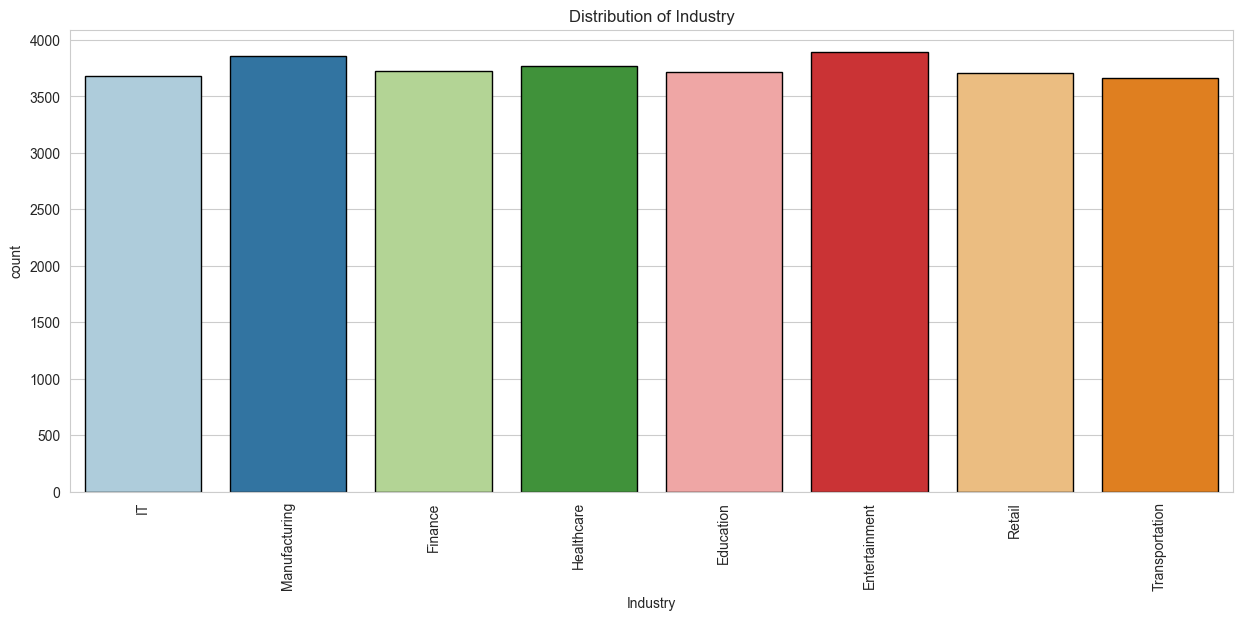

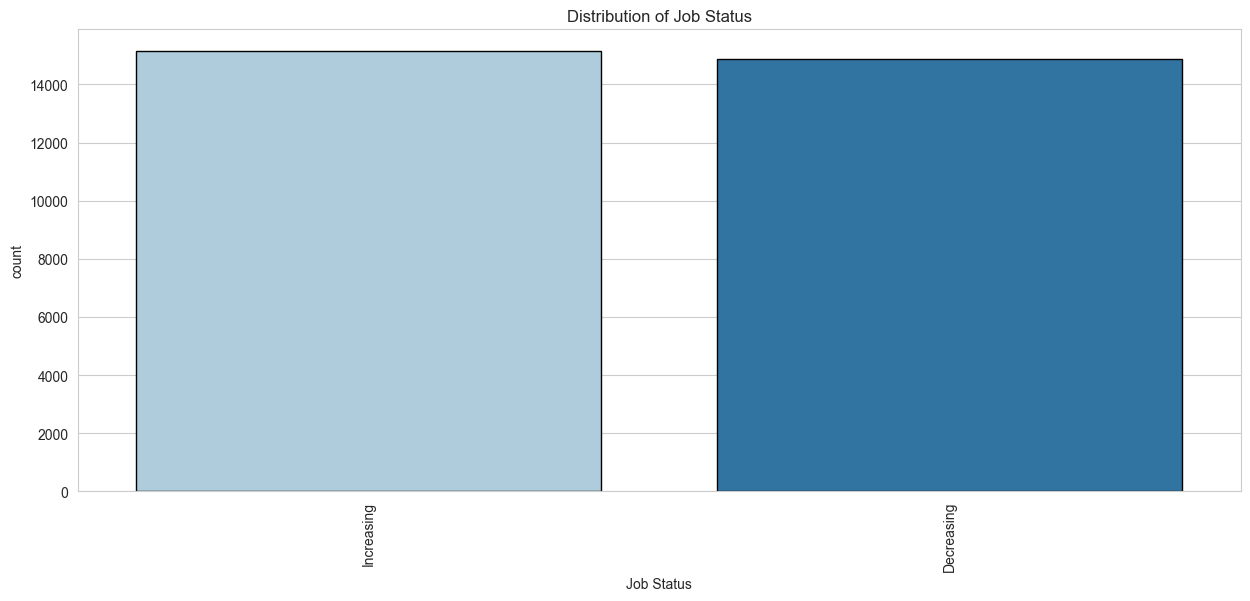

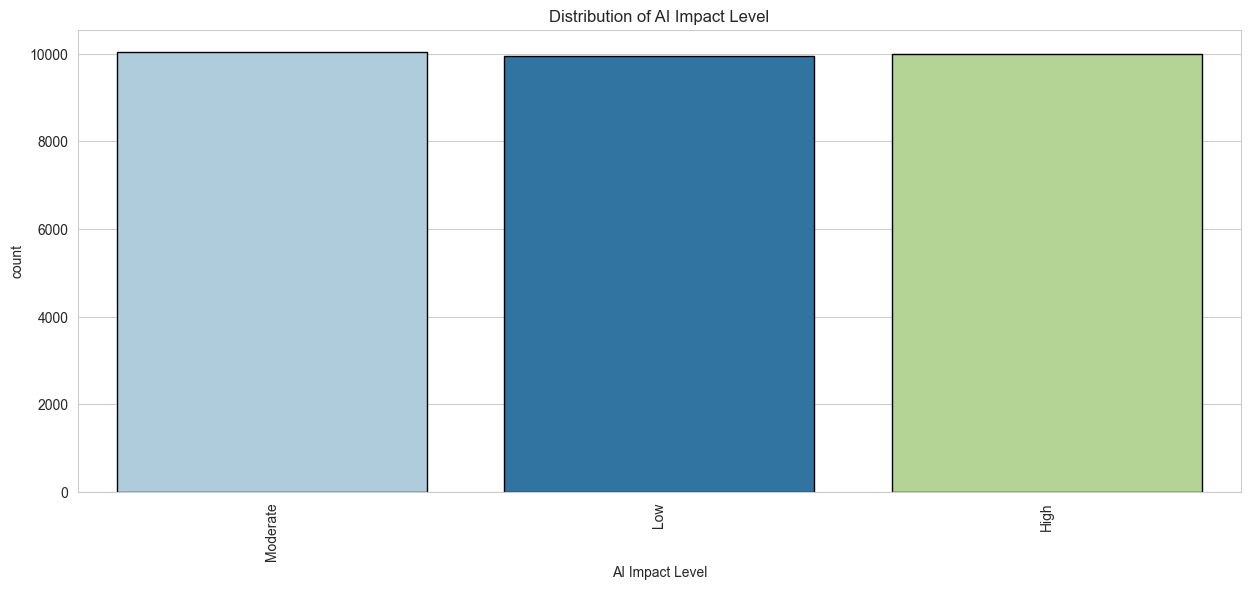

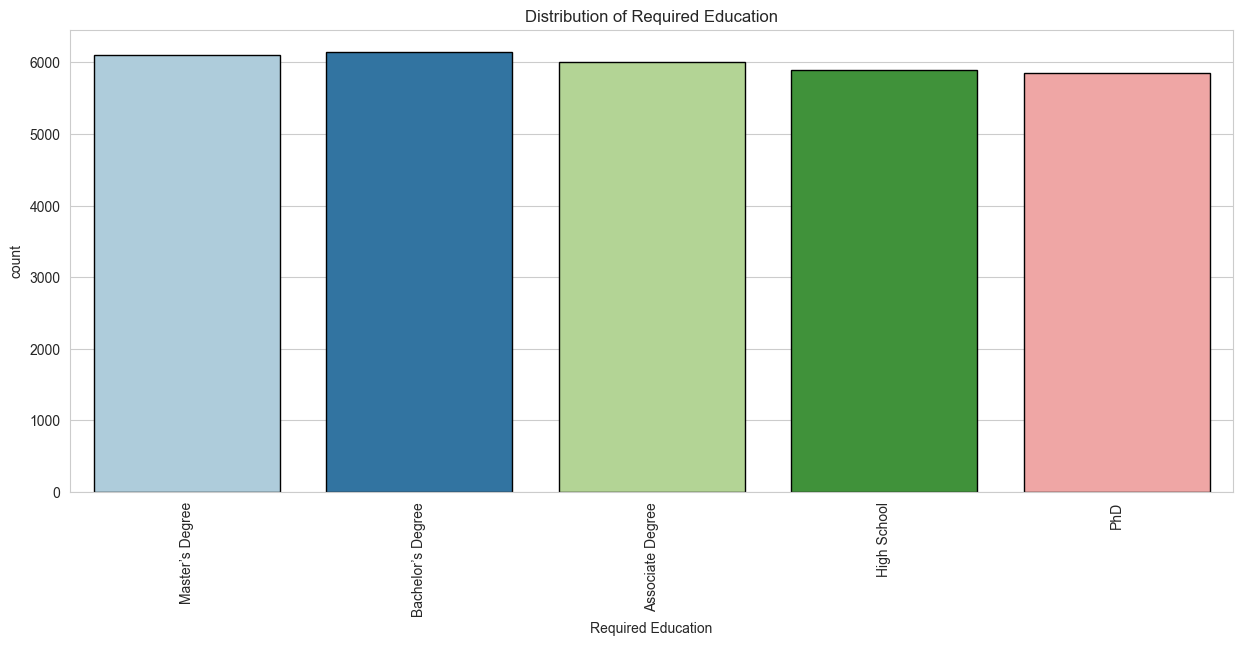

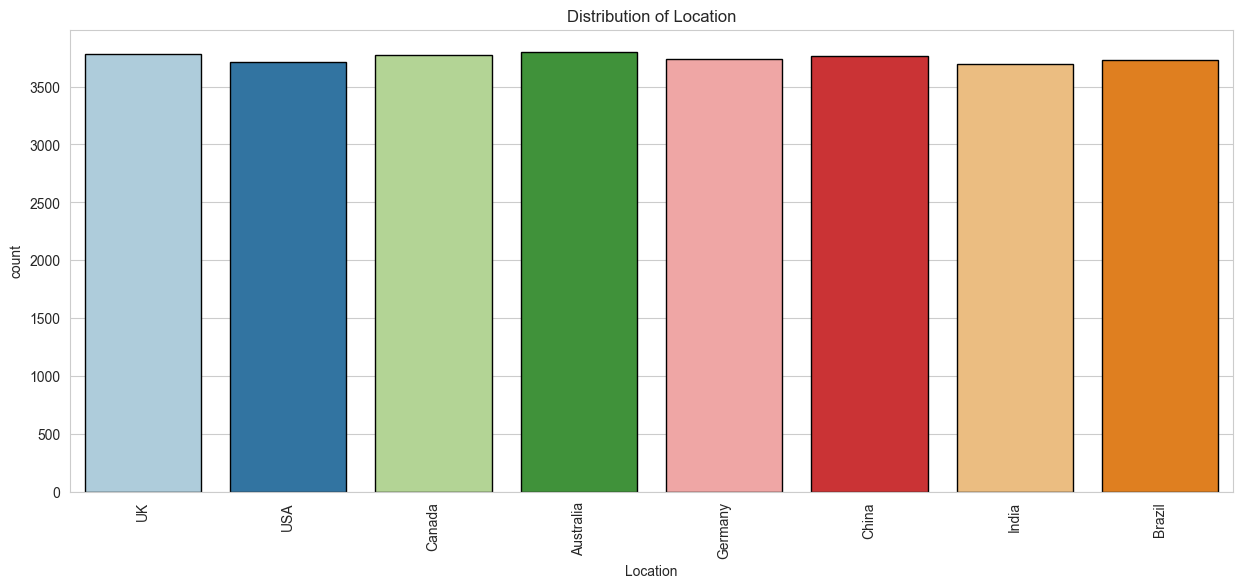

In [9]:
for col in df.drop(columns=["Job Title"]).select_dtypes(include=['object']).columns:
    plt.figure(figsize=(15,6))
    sns.countplot(x=col, data=df,palette="Paired",edgecolor="black")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [10]:
df.head()

Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342                  55.96   
1                 1243                       6205                  16.81   
2                 3338                       1154                  91.82   
3                 7173                       4060                   1.89   
4                 5944                       7396                  53.76   

   Automation Risk (%)   Location  Gender Diversity (%)  
0                28.28         UK                 44.63  
1                89.71        USA                 66.39  
2                72.97     Canada                 41.13  
3                99.94  Australia                 65.76  
4                37.65    Germany                 72.57

# Highest AVG Salary Job Field And The Impact Of AI 

In [11]:
classifi_hg=df.groupby(["Industry","AI Impact Level"])["Median Salary (USD)"].mean().sort_values(ascending=False).reset_index()
fig3 = px.bar(
    classifi_hg,
    x="Industry",
    y="Median Salary (USD)",
    color="AI Impact Level",
    barmode="group",
    title="Average Median Salary by Industry and AI Impact Level",
    labels={"Median Salary (USD)": "Average Median Salary (USD)"}
)
fig3.show()

# Pie distribution of job status 

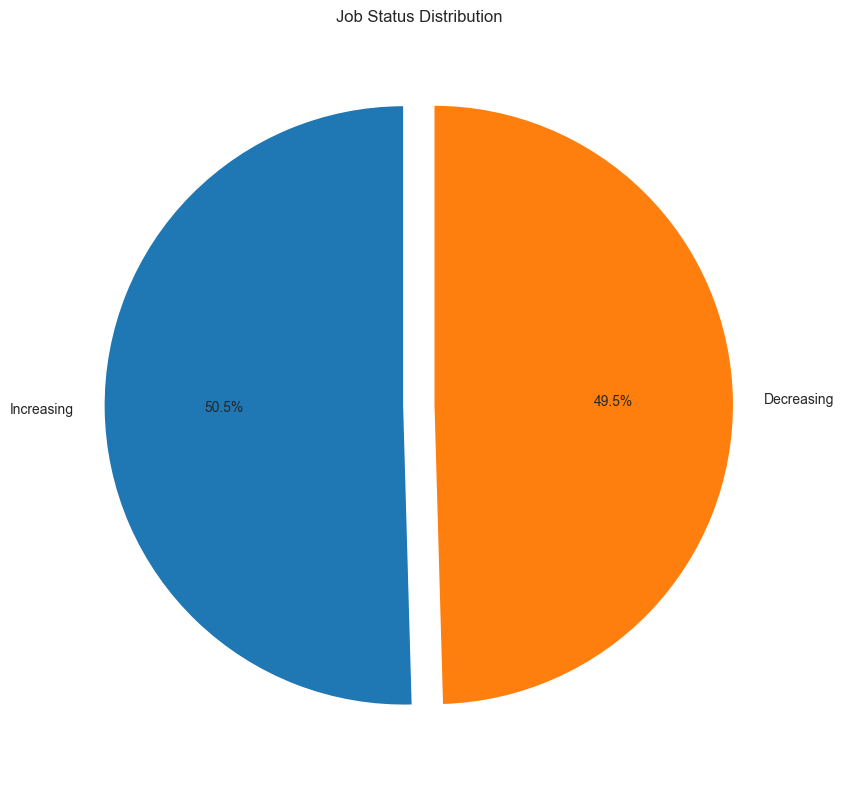

In [12]:
import matplotlib.pyplot as plt
df["Job Status"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(10, 8),
    explode=[0.05] * df["Job Status"].nunique(),
    startangle=90
)
plt.ylabel("")  # Optional: Hide y-axis label
plt.title("Job Status Distribution")
plt.tight_layout()
plt.show()


# Gender diversity classification by industry

In [13]:
classifi_g=df.groupby(["Industry","Gender Diversity (%)"]).size().sort_values(ascending=False).reset_index(name="Count").head(50)
classifi_g
fig_g = px.scatter(
    classifi_g,
    x="Industry",
    y="Gender Diversity (%)",
    size="Count",
    color="Industry",
    title="Gender Diversity by Industry",
    labels={"Gender Diversity (%)": "Gender Diversity (%)", "Industry": "Industry"},
    hover_data=["Count"]
)
fig_g.update_layout(xaxis_tickangle=45)
fig_g.show()

# Automation risk by job title

In [14]:
import plotly.express as px

# Create 'p' from value_counts of Job Titles
p = df["Job Title"].value_counts().reset_index().head(20)
p.columns = ["Job Title", "Count"]

fig = px.pie(p, names="Job Title", values="Count", title="Top 20 Job Titles")
fig.show()


# Top 30 Industry-Automation Risk Combinations with Highest Automation Risk

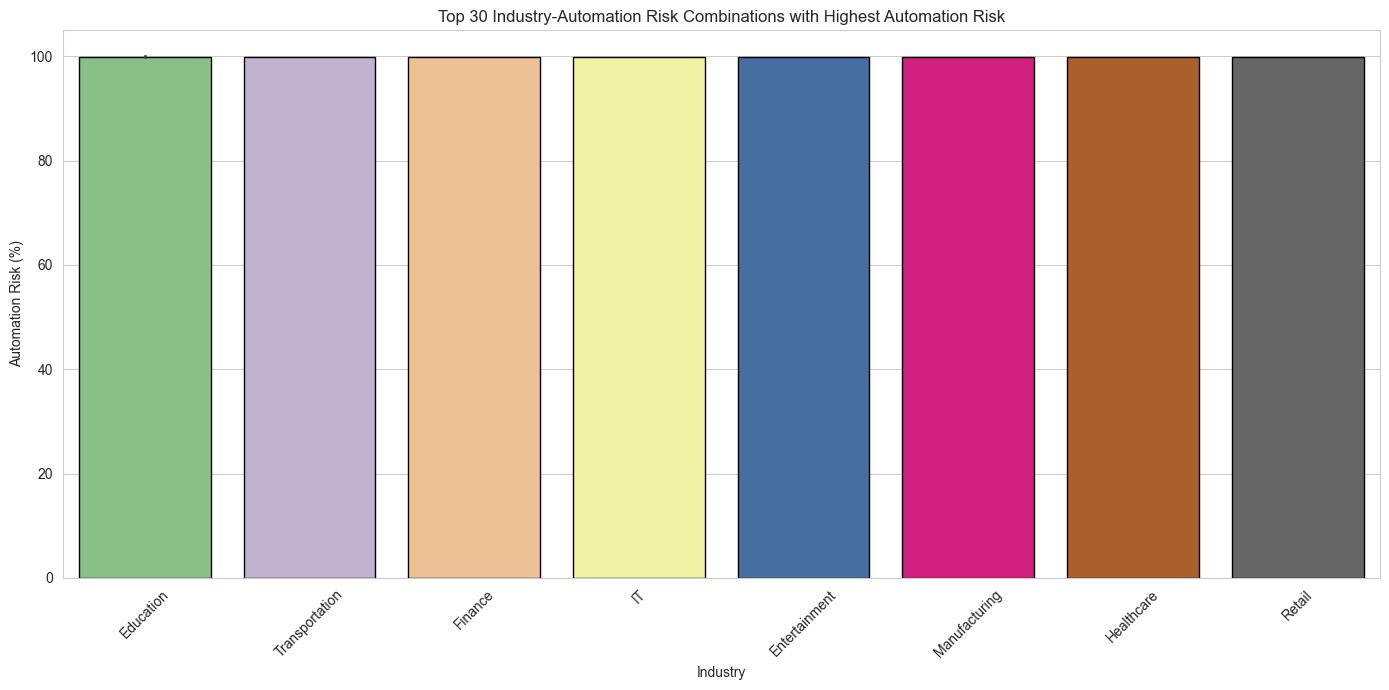

In [15]:
top_automation = df.groupby(["Industry", "Automation Risk (%)"]).size().reset_index(name="Count")
top_automation = top_automation.sort_values("Automation Risk (%)", ascending=False).head(30)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_automation,
    x="Industry",
    y="Automation Risk (%)",
    hue="Industry",
    dodge=False,
    palette="Accent",
    edgecolor='black'
)
plt.title("Top 30 Industry-Automation Risk Combinations with Highest Automation Risk")
plt.ylabel("Automation Risk (%)")
plt.xlabel("Industry")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

## Number of current and projected job openning (2024-2030)

In [16]:
classifi_co=df.groupby("Industry")[["Job Openings (2024)","Projected Openings (2030)"]].sum().reset_index()
classifi_co
import plotly.express as px

fig = px.bar(
    classifi_co.melt(id_vars="Industry", var_name="Year", value_name="Openings"),
    x="Industry",
    y="Openings",
    color="Year",
    barmode="group",
    title="Job Openings by Industry (2024 vs 2030)"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()



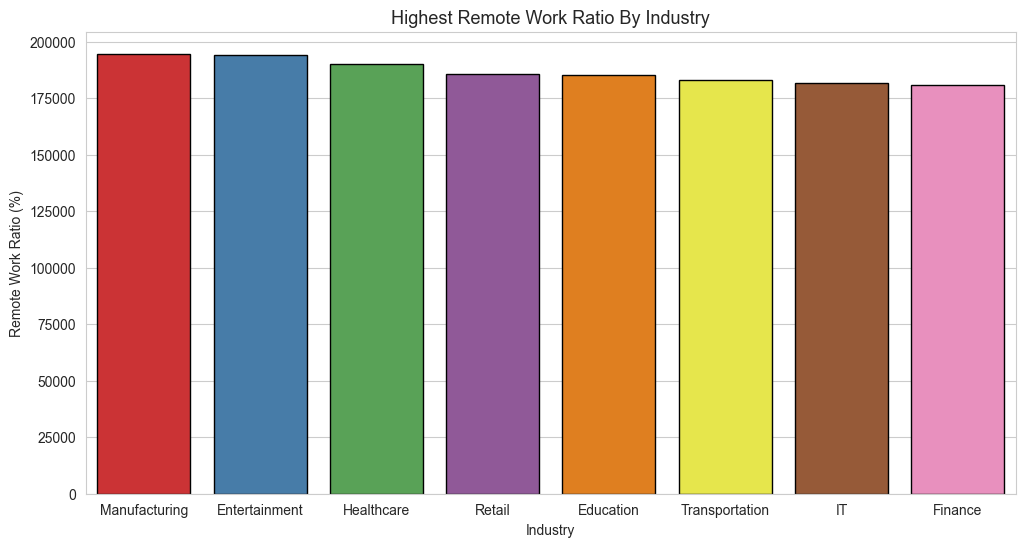

In [17]:
classifi_rem=df.groupby("Industry")["Remote Work Ratio (%)"].sum().sort_values(ascending=False).reset_index()
classifi_rem
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_rem,x="Industry",y="Remote Work Ratio (%)",edgecolor="black",palette="Set1")
plt.title("Highest Remote Work Ratio By Industry",size=13)
plt.show()

## Pairplot Distribution

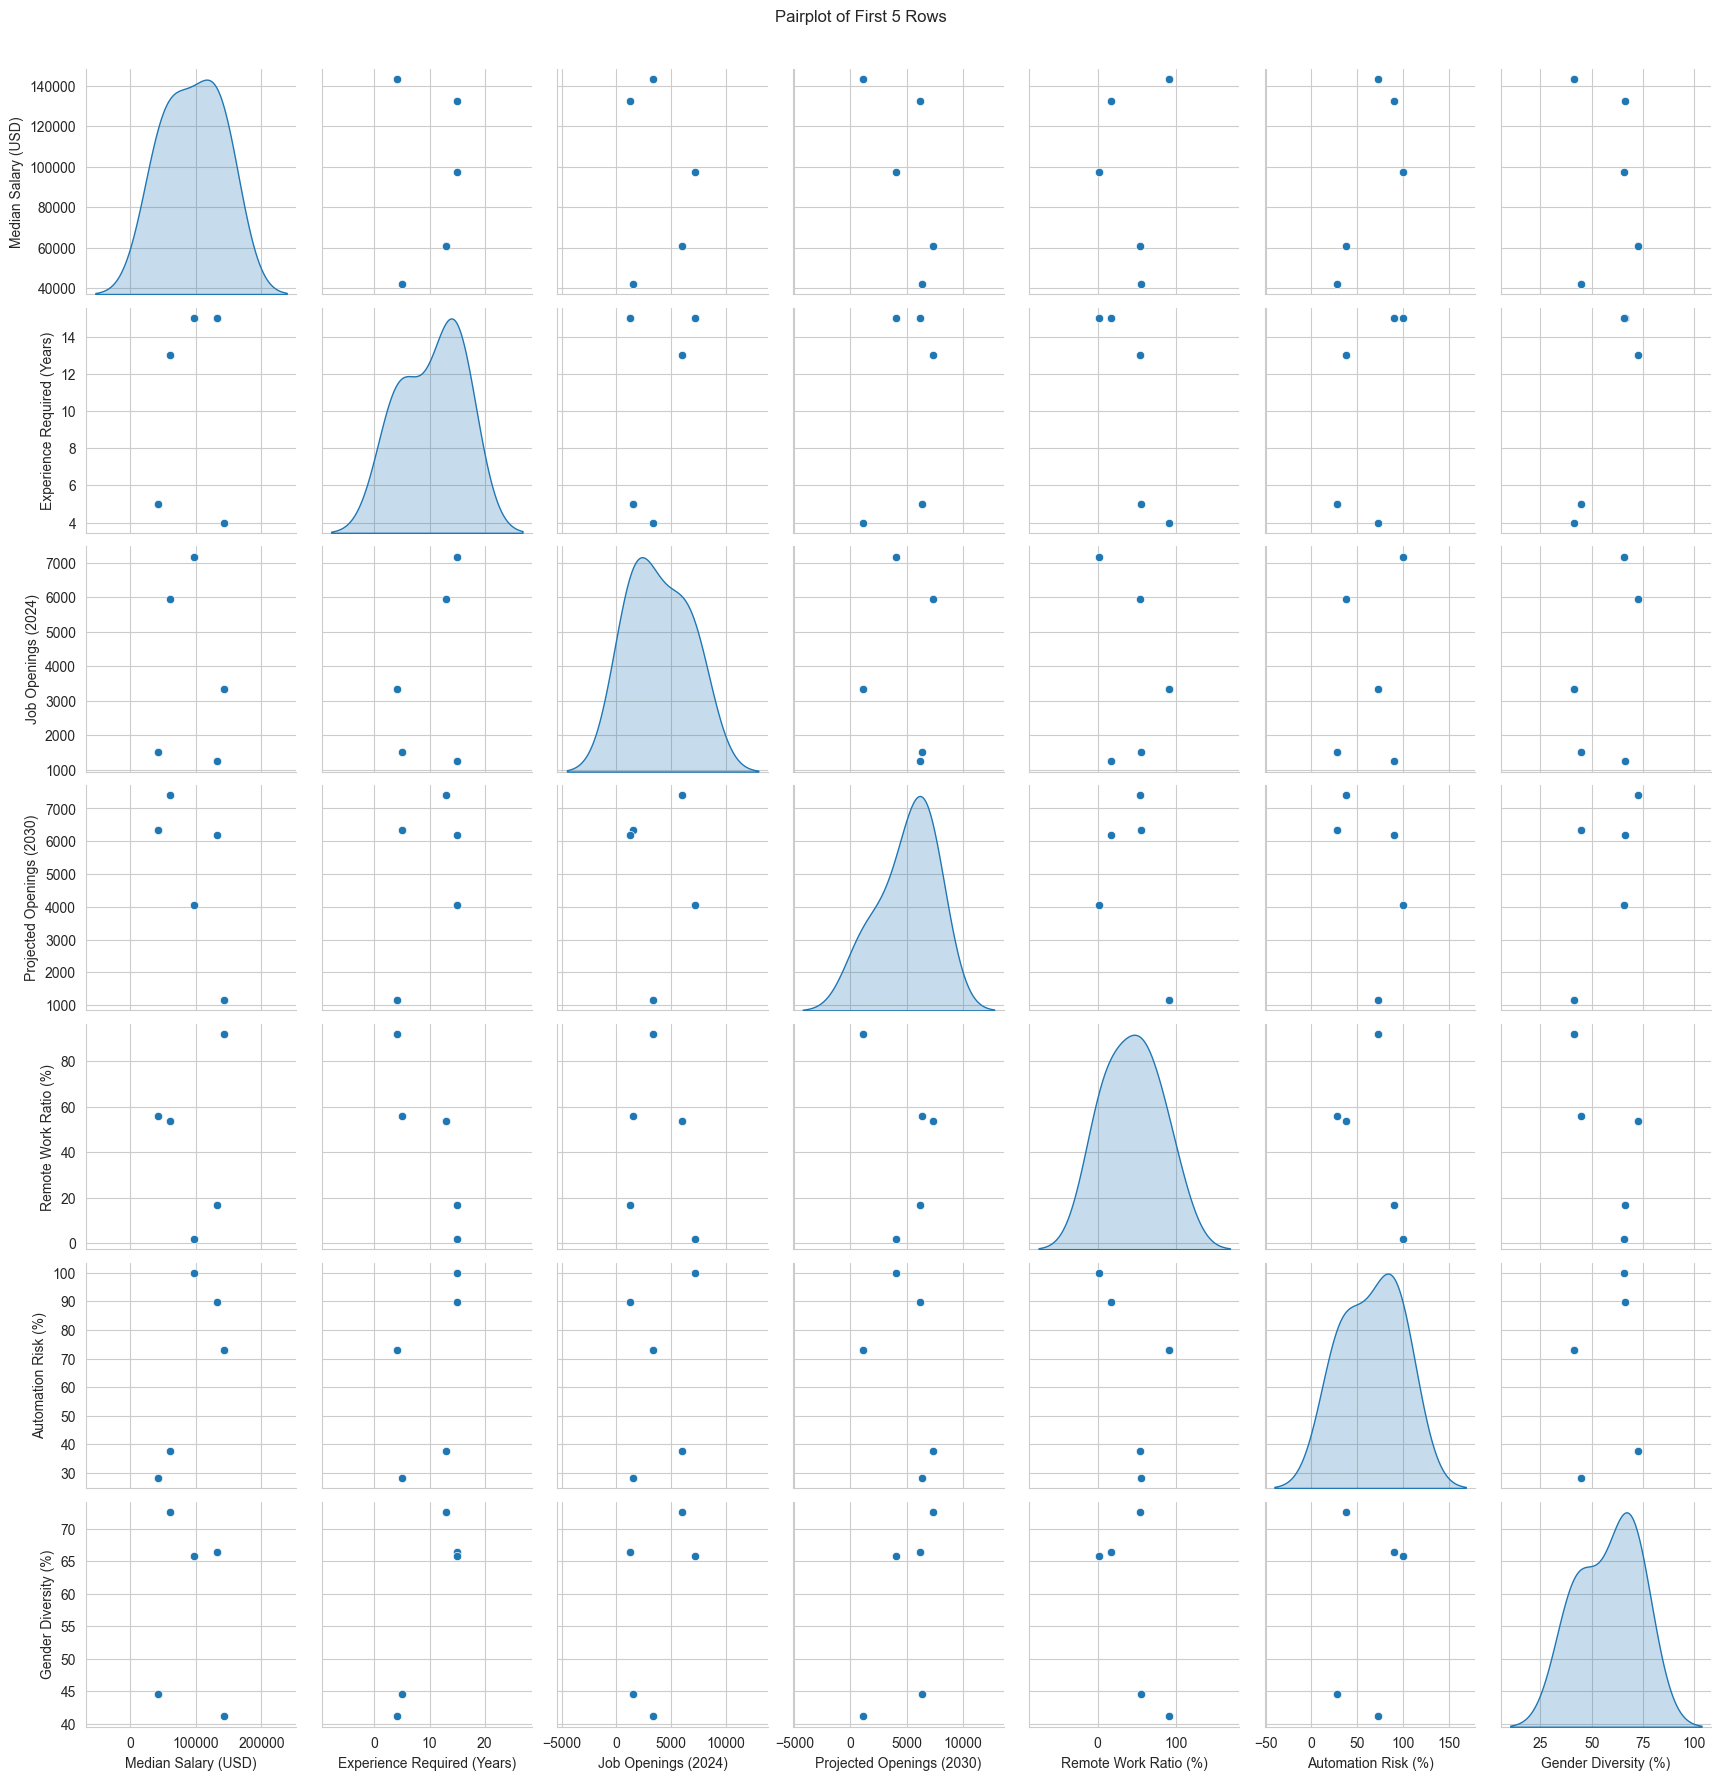

In [18]:
sns.pairplot(df.head(), diag_kind='kde')
plt.suptitle("Pairplot of First 5 Rows", y=1.02)
plt.show()

# Transforming the Global Job Market with Artificial Intelligence

Artificial intelligence is transforming the global job market, changing not only how we work but also which roles are most secure in the coming years. In this project, I set out to analyze a rich dataset capturing key aspects of jobs affected by AI, including job titles, industries, education requirements, automation risk, gender diversity, projected job openings, and more.

## Exploratory Data Analysis

To begin, I performed an in-depth exploratory data analysis to reveal patterns and relationships. For instance, I examined which job roles are at higher risk of automation and which ones are likely to remain in demand.

- Risks of Automation: The data showed that occupations requiring higher education levels and specialized skills tend to have a lower automation risk, while roles involving repetitive or routine tasks face a higher probability of being automated in the near future.

- Impact of Remote Work: I also explored how remote work is shaping the job landscape. Several industries have adapted to higher remote work ratios, which may expand access to jobs across regions and improve work-life balance for many workers. At the same time, some roles, especially those requiring on-site activities or physical presence, remain less adaptable to remote work.

## Gender Diversity Trends

Another important finding was the trend in gender diversity across various job categories. Certain traditionally male-dominated fields still struggle to achieve gender balance, while others show a healthier distribution. This suggests there is still work to do to make the workforce more inclusive.

## Projected Job Openings (2024-2030)

Projected job openings from 2024 through 2030 revealed which industries and roles are likely to see growth. Roles with strong analytical or creative components are expected to expand, even as AI reshapes tasks. This means that workers who can combine domain expertise with digital skills may have the best opportunities going forward.

## Conclusion

Overall, the analysis paints a picture of a job market in transition. AI is undoubtedly automating some tasks, but it is also creating opportunities for new roles and skill sets. This project helps highlight where workers, educators, and policymakers might focus their efforts to build a more resilient and future-ready workforce.
